In [45]:
import matplotlib.pyplot as plt
from stacked import plot_stacked_bars
import tomli

def load_config(path) -> dict:
    with open(path, 'rb') as f:
        return tomli.load(f)

config = load_config('./assess.toml')
dataset = 'adult'
baseline = 'fairtabddpm'

In [16]:
data = plot_stacked_bars(dataset, config, baseline)
# df = data['real']
df = data[baseline]
df.head(3)

dict_keys(['real', 'fairtabddpm'])


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,30,61081,14,0,0,35,Local-gov,Masters,Never-married,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
1,34,38639,9,99999,0,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
2,27,99695,13,0,0,40,Local-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Female,United-States,<=50K


         Female      Male
<=50K  0.377692  0.373358
>50K   0.124851  0.124099


(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

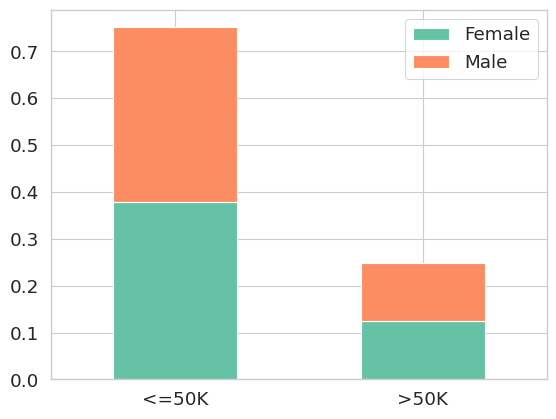

In [43]:
# stacked bar plot
import seaborn as sns

# target col
target_col = 'class'
# sensitive col
sens = ['sex', 'race']

# count df
count = {}
for s in sens:
    count[s] = {}

for s in sens:
    # count[s] = df.groupby([target_col, s]).size().unstack().fillna(0).to_dict()
    # norm 
    count[s] = df.groupby([target_col, s]).size().unstack().fillna(0).apply(lambda x: x/len(df), axis=0).to_dict()

import pandas as pd

print(pd.DataFrame(count['sex']))

fig, ax = plt.subplots()

pd.DataFrame(count['sex']).plot(kind='bar', stacked=True, ax=ax)

# rotate x-axis labels
plt.xticks(rotation=0)

<Axes: >

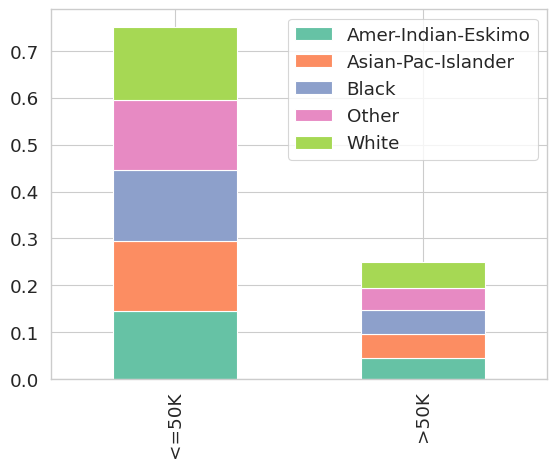

In [44]:
pd.DataFrame(count['race']).plot(kind='bar', stacked=True)